<a href="https://colab.research.google.com/github/hoiyurie/tibame-ml0602/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 載入手寫數字數據集，辨別0-9

from tensorflow.keras.datasets.mnist import load_data
# ((x_train,y_train),(x_test,y_test)) # tuple內有兩個tuple

(x_train, y_train),(x_test , y_test) = load_data()


In [12]:
print(x_train.shape)   # (60000,28,28 ) 60000張圖片 ，大小 28*28 
print(y_train.shape)   # 答案-> 60000個
print(x_test.shape)
print(x_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


5


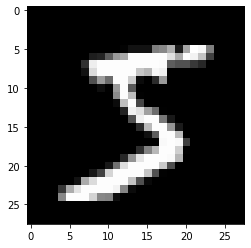

In [13]:
import matplotlib.pyplot as plt
print(y_train[0])
# reverse_color-> cmap="YlGn_r"
plt.imshow(x_train[0], cmap="gray")  # cmap可以更改顏色

In [14]:
import pandas as pd
pd.DataFrame(x_train[0])  
# 0:黑色

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [15]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# layers = [
#     # 第一層
#     # 784 * 128(線條) + 128(bias) = 100480 params
#     Dense(128, activation="relu", input_dim=784),
#     # input_dim= 28*28 -> 784

#     # 第二層
#     # 128 * 10(線條) + 10(bias) = 1290  params
#     Dense(10, activation="softmax")
# ]
# model = Sequential(layers)
# model.summary()

In [16]:
from tensorflow.keras.layers import Dense

layers = [
    # 第一層
    # 784 * 128(線條) + 128(bias) = 100480 params
    Dense(256, activation="relu", input_dim=784),  #  128—> 256 
    # input_dim= 28*28 -> 784

    # 第二層
    # 128 * 10(線條) + 10(bias) = 1290  params
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
# mse坡度在你預測很差的時候太小, cross entropy坡度好多了
# 二元(sigmoid): Binary Cross Entropy  p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax): Categorical Cross Entropy  pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [18]:
# 資料預處理
# 答案: [0, 5, 2, 3....]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
# 圖片預處理

# 圖片: [[255, 0, 255, 128]]
# 28 * 28 -> 784
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0
# print(x_train_norm[0])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小（20*20算小圖）:200, 圖片大（200*200算大圖）:20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)

# patience=5 （比如0.25是最低，從0.25 開始向後數5個，如果沒有比他更小的，就停止）
# restore_best_weights=True 回到最好的那一次
# save_best_only=True  只會保存最好的那一次
# epchs 最大值是100，設定成最大值，才會中間停下來

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
270/270 - 1s - loss: 0.3734 - accuracy: 0.8958 - val_loss: 0.1725 - val_accuracy: 0.9523
Epoch 2/100
270/270 - 1s - loss: 0.1640 - accuracy: 0.9537 - val_loss: 0.1130 - val_accuracy: 0.9670
Epoch 3/100
270/270 - 1s - loss: 0.1147 - accuracy: 0.9671 - val_loss: 0.0953 - val_accuracy: 0.9717
Epoch 4/100
270/270 - 1s - loss: 0.0862 - accuracy: 0.9750 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 5/100
270/270 - 1s - loss: 0.0675 - accuracy: 0.9804 - val_loss: 0.0773 - val_accuracy: 0.9780
Epoch 6/100
270/270 - 1s - loss: 0.0547 - accuracy: 0.9845 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 7/100
270/270 - 1s - loss: 0.0441 - accuracy: 0.9876 - val_loss: 0.0707 - val_accuracy: 0.9785
Epoch 8/100
270/270 - 1s - loss: 0.0370 - accuracy: 0.9897 - val_loss: 0.0698 - val_accuracy: 0.9790
Epoch 9/100
270/270 - 1s - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0661 - val_accuracy: 0.9813
Epoch 10/100
270/270 - 1s - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.0727 - val_accura

In [21]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9792


[0.06949539482593536, 0.979200005531311]

最開始把 dense 設定成128，看到結果，可以再調節看看，換成64/256/512 試試看，最後dense=256 結果比較好

In [23]:
from sklearn.metrics import confusion_matrix
# 以前 predict_proba  --> 現在 predict
# 以前 predict --> 現在 predict_classes
# 只要在tensorflow裡：就帶one-hot後的 y_test_cat
# 不在tensorflow： 就帶原本的 y_test

pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(i) for i in range(10)],
             index=["{}(正確)".format(i) for i in range(10)],)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),973,0,1,0,0,0,3,1,2,0
1(正確),0,1124,3,1,0,1,2,1,3,0
2(正確),3,1,1006,4,1,0,2,5,10,0
3(正確),1,0,3,992,1,4,0,2,4,3
4(正確),0,0,1,1,964,0,5,4,1,6
5(正確),2,0,0,6,1,870,6,2,3,2
6(正確),4,2,4,1,5,4,934,2,2,0
7(正確),0,2,6,2,0,0,0,1011,4,3
8(正確),4,1,5,4,4,2,2,3,947,2
9(正確),2,3,3,5,10,4,0,7,4,971


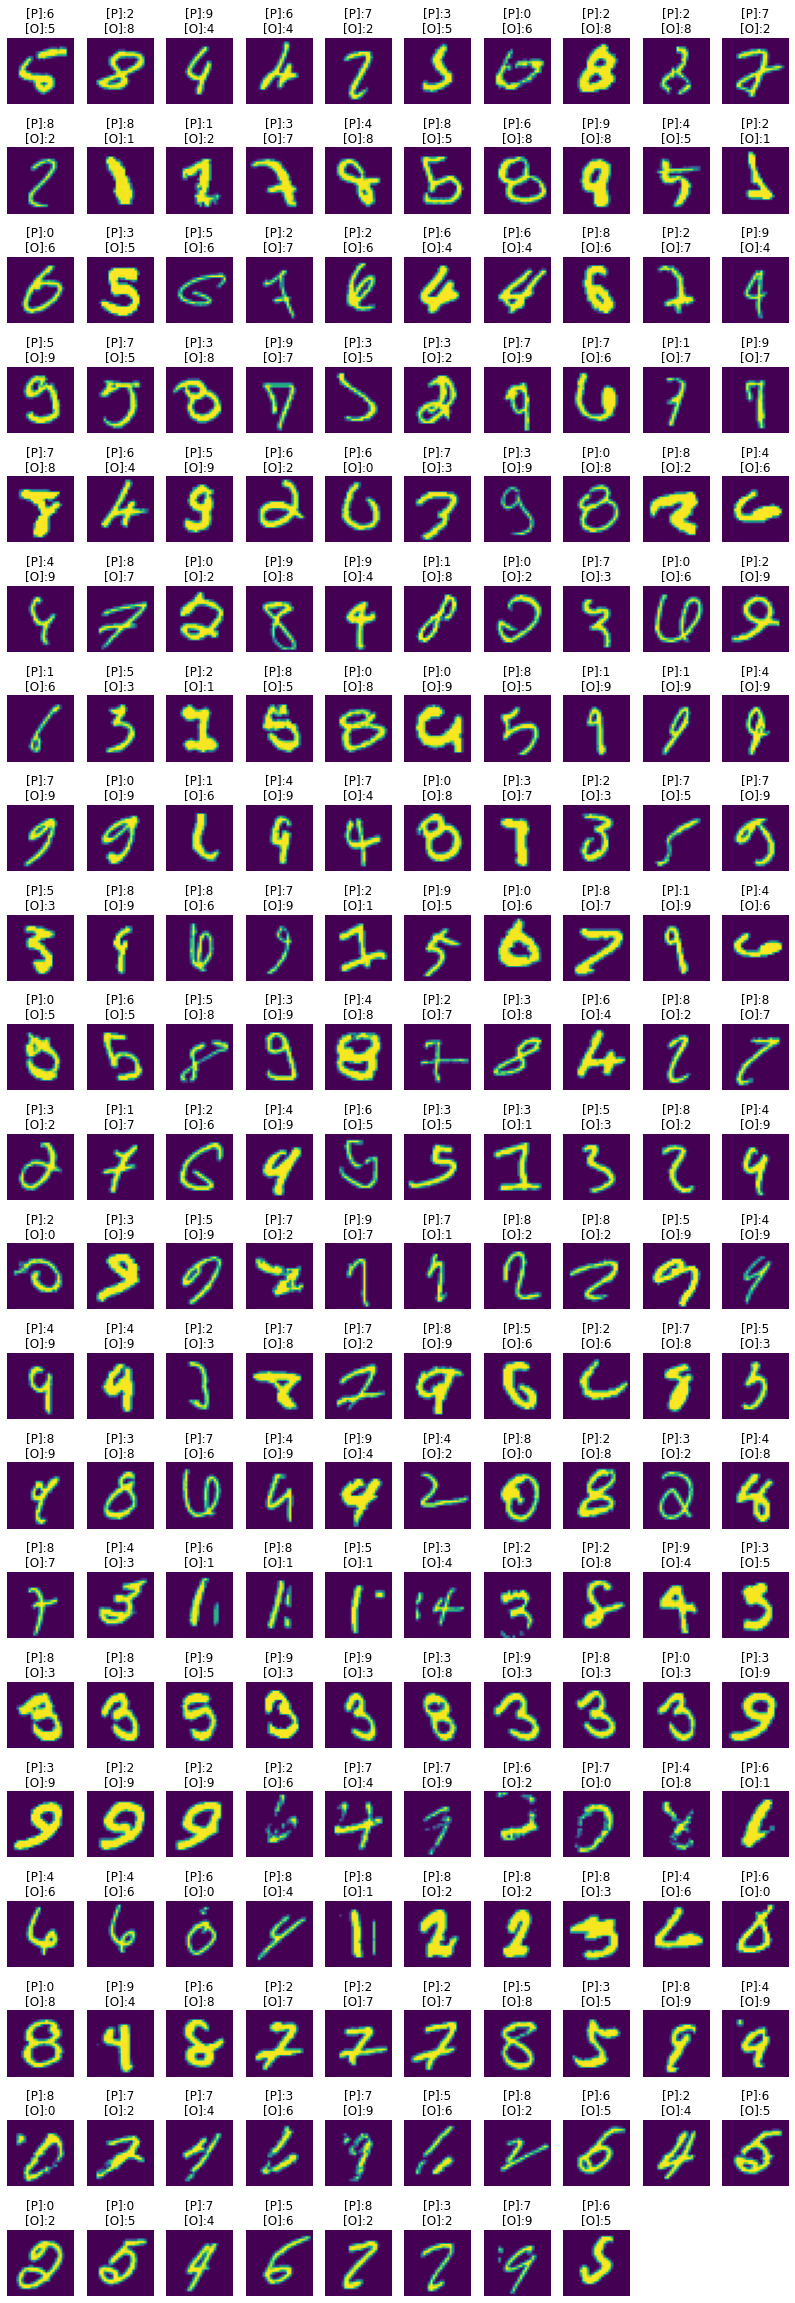

In [24]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]  # 找出預測錯誤的原本的值
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(false_pre[i], false_label[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])


# [p]:predict
# [O]:original
